In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
%matplotlib inline
import matplotlib.pyplot as plt

import sys 
import inspect
import seaborn as sns
import os

import perturbseq as perturb
import sc_eVIP

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, color_map='viridis')
sc.logging.print_versions()

scanpy==1.5.1 anndata==0.7.1 umap==0.4.4 numpy==1.17.2 scipy==1.4.1 pandas==0.24.2 scikit-learn==0.22 statsmodels==0.11.0 python-igraph==0.7.1 louvain==0.6.1 leidenalg==0.8.1


In [2]:
PROTEIN='KRAS'
DATA='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14'
SUBSAMPLED=DATA+'/'+PROTEIN+'/subsampled/A549.'+PROTEIN

counts=20000

FIGS=DATA+'/2021-03-22_Figures/'
os.system('mkdir -p '+FIGS)
print(FIGS)

sc.settings.figdir=FIGS

/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/2021-03-22_Figures/


In [3]:
print(SUBSAMPLED+'.channel_1to32.counts_per_cell'+str(counts)+'.regress_out_vbc.analysis.1000cells.new_format.h5ad')

/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/KRAS/subsampled/A549.KRAS.channel_1to32.counts_per_cell20000.regress_out_vbc.analysis.1000cells.new_format.h5ad


In [4]:
adata=sc.read(SUBSAMPLED+'.channel_1to32.counts_per_cell'+str(counts)+'.regress_out_vbc.analysis.1000cells.new_format.h5ad',cache=False)
adata

Only considering the two last: ['.new_format', '.h5ad'].
Only considering the two last: ['.new_format', '.h5ad'].


AnnData object with n_obs × n_vars = 90262 × 1145 
    obs: 'batch', 'known', 'n_counts', 'n_genes', 'percent_mito', 'n_counts_downsampled', 'n_counts_original', 'vbc.counts', 'batch_num4', 'batch_num7', 'batch_num11', 'batch_num8', 'batch_num13', 'batch_num23', 'batch_num9', 'batch_num2', 'batch_num24', 'batch_num10', 'batch_num12', 'batch_num16', 'batch_num20', 'batch_num18', 'batch_num25', 'batch_num31', 'batch_num28', 'batch_num5', 'batch_num14', 'batch_num15', 'batch_num29', 'batch_num3', 'batch_num6', 'batch_num22', 'batch_num26', 'batch_num17', 'batch_num27', 'batch_num1', 'batch_num19', 'batch_num21', 'batch_num0', 'batch_num30', 'louvain', 'G1.S', 'G2.M', 'M', 'M.G1', 'S', 'phase.multi', 'guide', 'guide.compact', 'A146P', 'K117R', 'Y166H', 'K169K', 'K178K', 'T50P', 'A146V', 'L52F', 'K176Q', 'A155G', 'G60D', 'T158T', 'K88K', 'D119G', 'L159S', 'G13V', 'Q61P', 'D33E', 'S136N', 'K179R', 'T74T', 'G60S', 'Q99E', 'G13R', 'G12D', 'R164Q', 'I36M', 'C185Y', 'I163S', 'P34R', 'G60V', 'G12

In [5]:
adata.obs['variant']=adata.obs['guide.compact']
del adata.obs['guide.compact']
for i in ['Cluster', 'Cluster2', 'P0', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'cluster_color2']:
    del adata.obs[i]
for i in ['bulk.guide.compact.program', 'bulk.guide.compact.program_color']:
    del adata.var[i]
for i in ['Cluster2_colors', 'Cluster_colors', 'bulk.guide.compact', 
          'bulk.guide.compact.perturbation_module', 'bulk.guide.compact.perturbation_module_color',
          'bulk.programs.avg', 'bulk.programs.vs_WT.avg', 'bulk.programs.vs_WT.p', 
          'bulk.programs.vs_unassigned.avg', 'bulk.programs.vs_unassigned.p','phase.multi_colors']:
    del adata.uns[i]
del adata.obsm['cell2guide']
for i in ['G1.S', 'G2.M', 'M', 'M.G1', 'S', 'phase.multi']:
    del adata.obs[i]

In [6]:
adata

AnnData object with n_obs × n_vars = 90262 × 1145 
    obs: 'batch', 'known', 'n_counts', 'n_genes', 'percent_mito', 'n_counts_downsampled', 'n_counts_original', 'vbc.counts', 'batch_num4', 'batch_num7', 'batch_num11', 'batch_num8', 'batch_num13', 'batch_num23', 'batch_num9', 'batch_num2', 'batch_num24', 'batch_num10', 'batch_num12', 'batch_num16', 'batch_num20', 'batch_num18', 'batch_num25', 'batch_num31', 'batch_num28', 'batch_num5', 'batch_num14', 'batch_num15', 'batch_num29', 'batch_num3', 'batch_num6', 'batch_num22', 'batch_num26', 'batch_num17', 'batch_num27', 'batch_num1', 'batch_num19', 'batch_num21', 'batch_num0', 'batch_num30', 'louvain', 'guide', 'A146P', 'K117R', 'Y166H', 'K169K', 'K178K', 'T50P', 'A146V', 'L52F', 'K176Q', 'A155G', 'G60D', 'T158T', 'K88K', 'D119G', 'L159S', 'G13V', 'Q61P', 'D33E', 'S136N', 'K179R', 'T74T', 'G60S', 'Q99E', 'G13R', 'G12D', 'R164Q', 'I36M', 'C185Y', 'I163S', 'P34R', 'G60V', 'G12A', 'K117N', 'T158A', 'G12I', 'T74A', 'K5E', 'P34L', 'A59E', 'A146

### Load Gene Signatures for Each Cell Cycle Phase

In [7]:
#do the cell cycle scoring
data_dir = '/ahg/regevdata/projects/Cell2CellCommunication/code/sc_eVIP/analysis/2020-02-14/'
cc_phases = np.loadtxt(os.path.join(data_dir,'cell_cycle_genes.csv'),delimiter=',',dtype=str)
### table S2 from Macosko 2015, https://www.cell.com/fulltext/S0092-8674(15)00549-8

'''
"Gene sets reflecting five phases of the HeLa cell cycle (G1/S, S, G2/M, M and M/G1) were taken from
Whitfield et al. (Whitfield et al., 2002) (Table S2), and refined by examining the correlation between
the expression pattern of each gene and the average expression pattern of all genes in the respective
gene-set, and excluding genes with a low correlation (R<0.3). This step removed genes that were
identified as phase-specific in HeLa cells but did not correlate with that phase in our single-cell data.
The remaining genes in each refined gene-set were highly correlated (not shown). We then averaged the
normalized expression levels (log2(TPM+1)) of the genes in each gene-set to define the phase-specific
scores of each cell. These scores were then subjected to two normalization steps. First, for each phase,
the scores were centered and divided by their standard deviation. Second, the normalized scores of each
cell were centered and normalized. 

To order cells according to their progression along the cell cycle, we first compared the pattern of
phase-specific scores of each cell to eight potential patterns along the cell cycle: only G1/S is on, both
G1/S and S, only S, only G2/M, G2/M and M, only M, only M/G1, M/G1 and G1. We also added a
ninth pattern for equal scores of all phases (either all active or all inactive). Each pattern was defined
simply as a vector of ones for active programs and zeros for inactive programs. We then classified the
cells by the defined patterns based on the maximal correlation of the phase-specific scores with these
potential patterns. Importantly, none of the cells were classified to the ninth pattern of equal activity,
while multiple cells were assigned to each of the other patterns. To further order the cells within each
class, we sorted the cells based on their relative correlation with the preceding and succeeding patterns,
thereby smoothing the transitions between classes (Figure 4A)
'''

cc_phases_dict = {}
for i in range(cc_phases.shape[1]):
    phase = cc_phases[0,i].strip()
    if '\ufeff' in phase:
        phase = phase.split('\ufeff')[1]
    cc_phases_dict[phase] = [val.strip() for val in cc_phases[1:,i] if len(val) > 1]

### Retain Genes in Signatures that are Correlated with Mean Signature Scores

In [8]:
from scipy.stats import spearmanr

genes=adata.var_names
filtered_X=adata.raw[:,genes].X.toarray()
genes2keep_dict = {phase: [] for phase in cc_phases_dict.keys()}
for phase in cc_phases_dict.keys():
    phase_gene_inds = [list(genes).index(gene) for gene in cc_phases_dict[phase] if gene in genes]
    print(phase,len(phase_gene_inds),'/',len(cc_phases_dict[phase]))
    phase_gene_means = filtered_X[:,phase_gene_inds].mean(1)
    for ind in phase_gene_inds:
#         cells2keep = np.where(filtered_X[:,ind] != 0)[0]
        rho,p = spearmanr(filtered_X[:,ind],phase_gene_means)
        if rho > 0.3:
            genes2keep_dict[phase].append(genes[ind])
    print(phase,len(genes2keep_dict[phase]),'/',len(cc_phases_dict[phase]))
    print('-----')

G1/S 12 / 100
G1/S 8 / 100
-----
S 15 / 113
S 5 / 113
-----
G2/M 40 / 133
G2/M 27 / 133
-----
M 47 / 151
M 42 / 151
-----
M/G1 21 / 106
M/G1 12 / 106
-----


### Calculate Phase Scores

In [9]:
# NORMALIZE ACROSS PHASES (S.T. NO SINGULAR CELL CYCLE PHASE SCORE/EXPRESSION PROFILES DOMINATES!)
phases = sorted(list(genes2keep_dict.keys()))
cc_scores = np.zeros((filtered_X.shape[0],len(phases)))
print(cc_scores.shape)

for i,phase in enumerate(phases):
    phase_gene_inds = [list(genes).index(gene) for gene in genes2keep_dict[phase]] 
    print(filtered_X[:,phase_gene_inds].mean(1).shape)
    cc_scores[:,i] = filtered_X[:,phase_gene_inds].mean(1)

# normalize scores (across phases)
cc_scores = (cc_scores - cc_scores.mean(0))/cc_scores.std(0)

# # normalize scores (across cells) - DO NOT INCLUDE
# cc_scores = ((cc_scores.T - cc_scores.mean(1))/cc_scores.std(1)).T

(90262, 5)
(90262,)
(90262,)
(90262,)
(90262,)
(90262,)


In [10]:
import re
for i,phase in enumerate(phases):
    adata.obs[re.sub('/','.',phase)]=cc_scores[:,i]

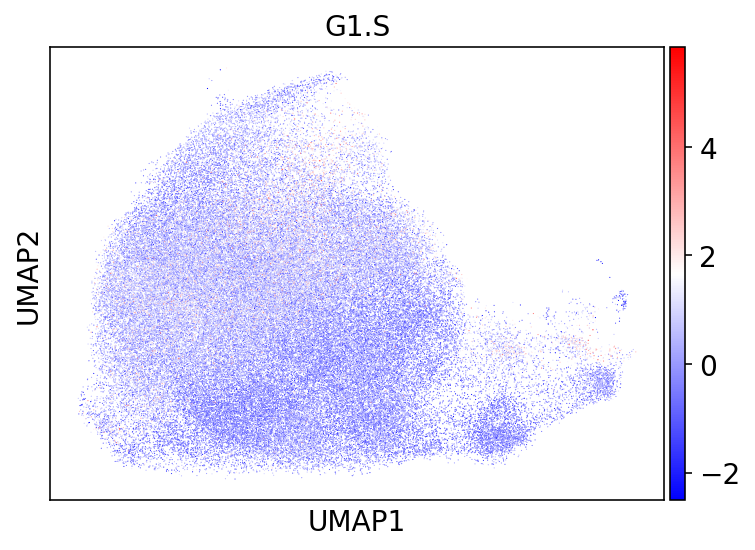

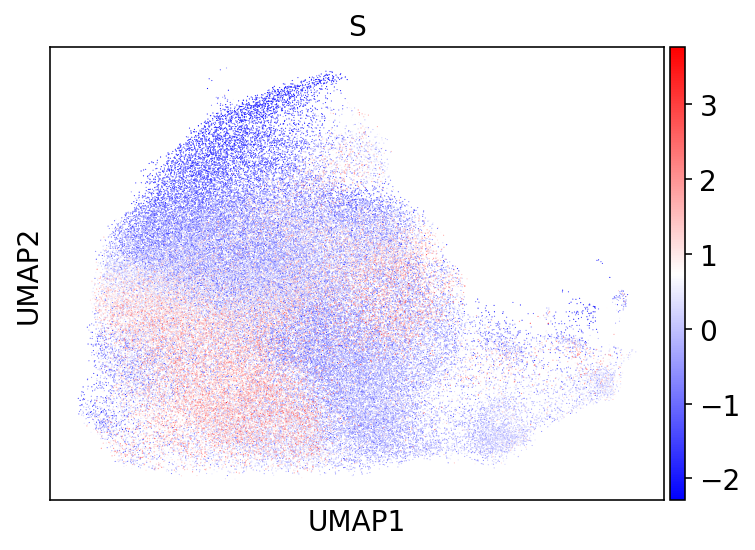

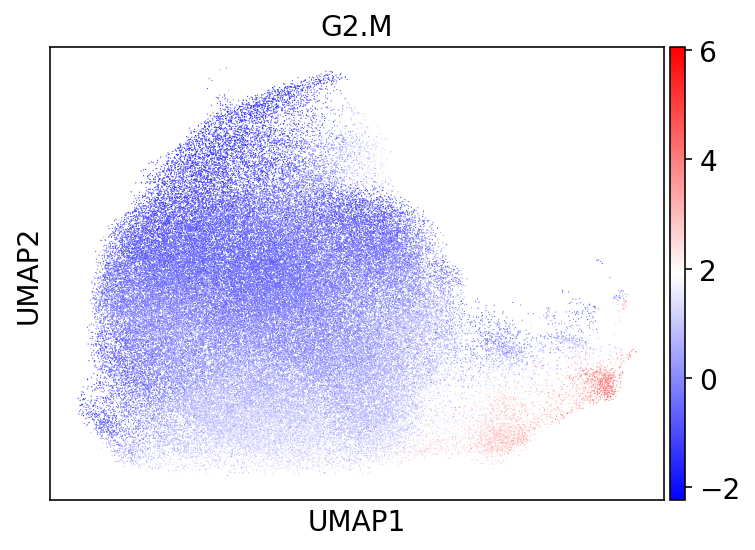

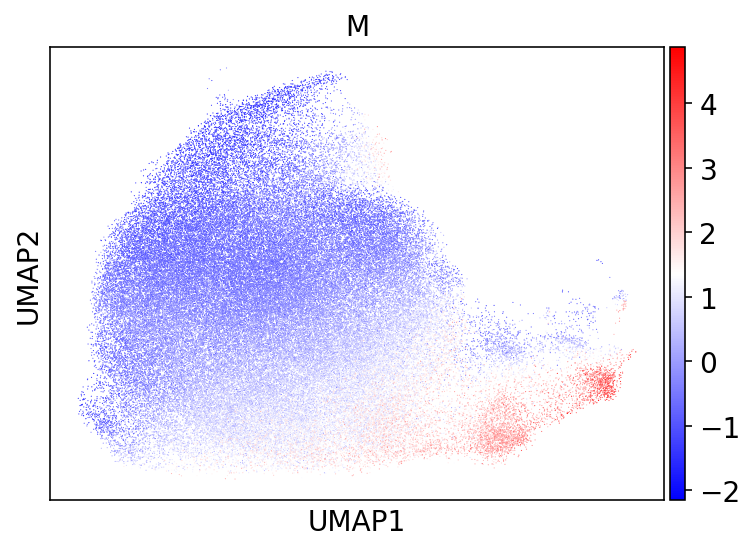

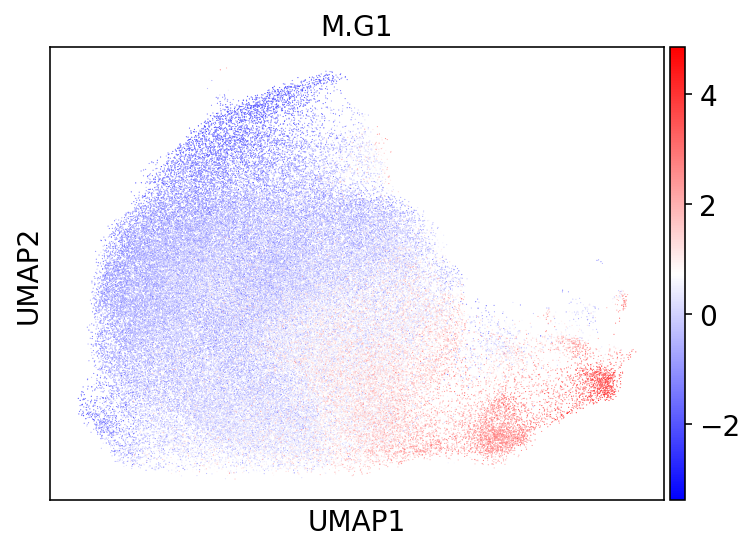

In [11]:
for phase in cc_phases_dict:
    sc.pl.umap(adata,color=[re.sub('/','.',phase)],cmap='bwr')#,vmin=-1,vmax=1)

### Assign Phase to Each Cell
#### Identify Cells in G0/"G-other" Phase
1, if at least 1 phase's signature scores are positive  
0, otherwise (if none of the signature scores are positive) 

In [12]:
cycling_labels = ((cc_scores < 0).sum(1) != len(phases))

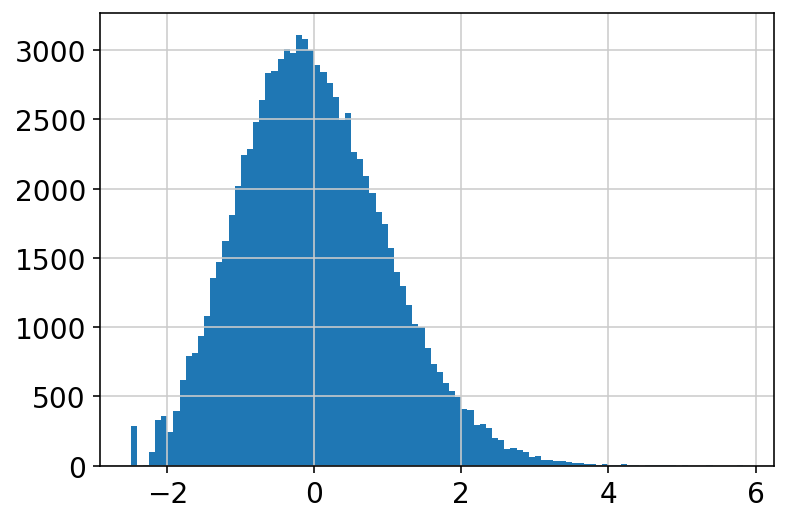

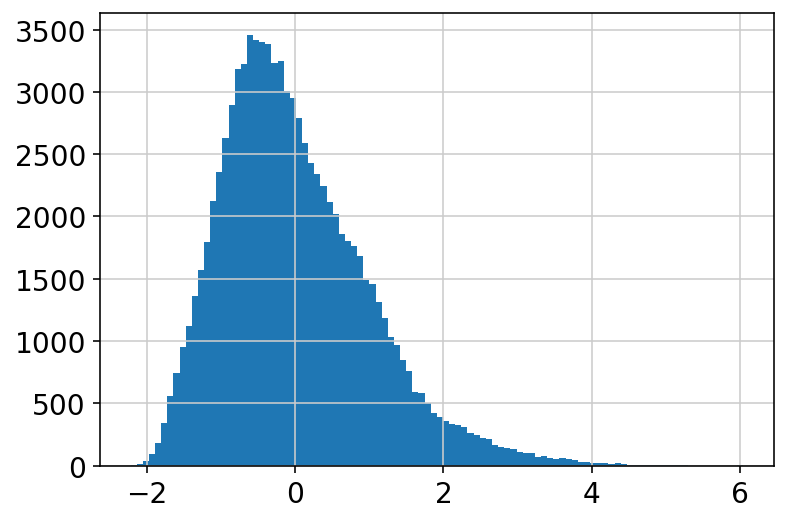

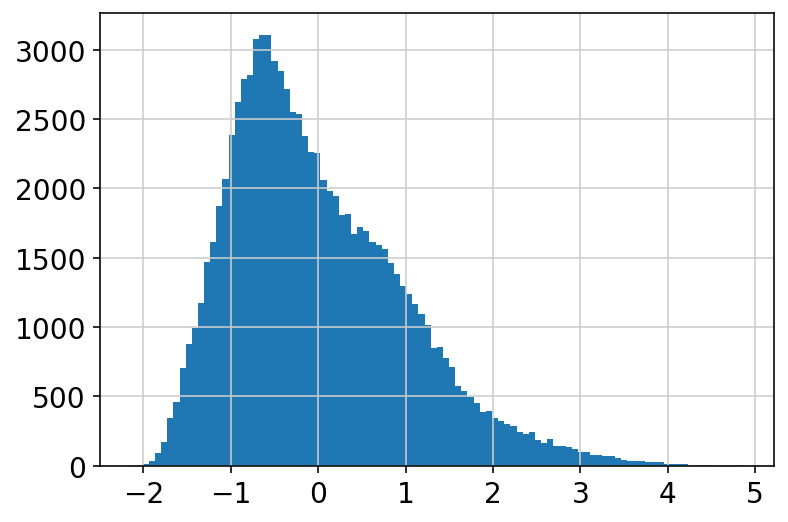

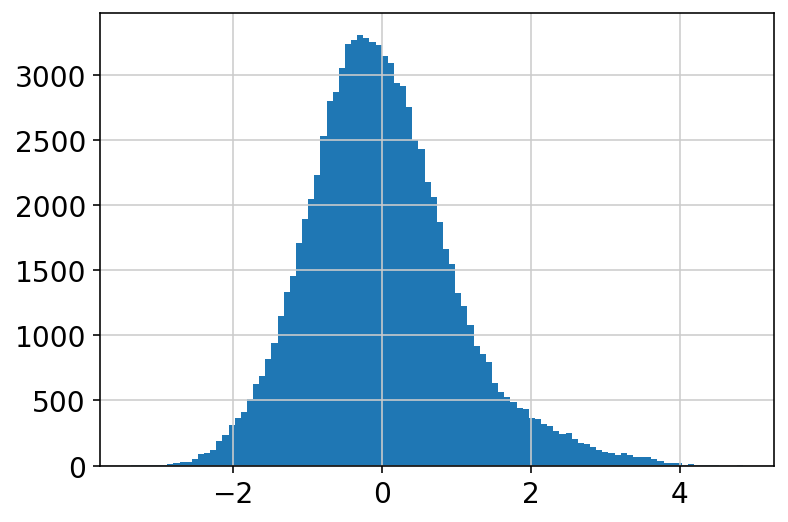

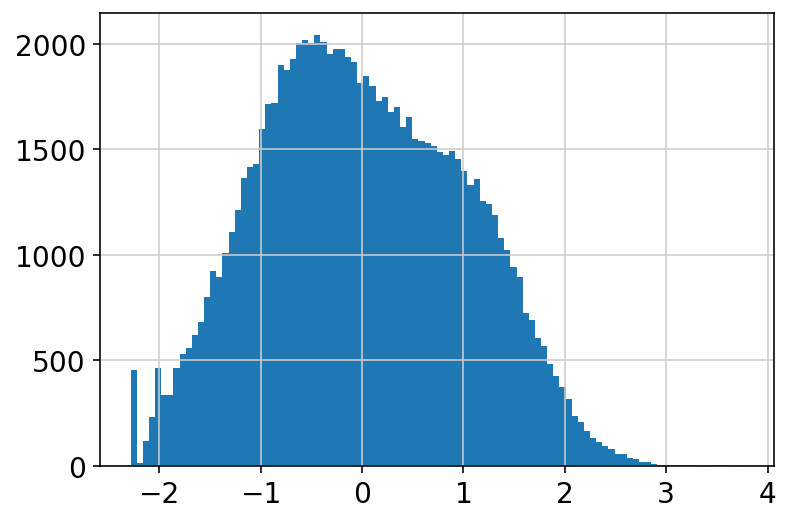

In [13]:
x=plt.hist(cc_scores[:,0],100)
plt.show()
x=plt.hist(cc_scores[:,1],100)
plt.show()
x=plt.hist(cc_scores[:,2],100)
plt.show()
x=plt.hist(cc_scores[:,3],100)
plt.show()
x=plt.hist(cc_scores[:,4],100)
plt.show()

#### Assign Phases

In [14]:
cc_stages = np.array([phases[i] for i in np.argmax(cc_scores,axis=1)])

In [15]:
import re
phase_assignments = []
for i,label in enumerate(cycling_labels):
    if label == 0:
        phase_assignments.append('Non-cycling')
    else:
        phase_assignments.append(re.sub('/','.',cc_stages[i]))

... storing 'phase.multi' as categorical


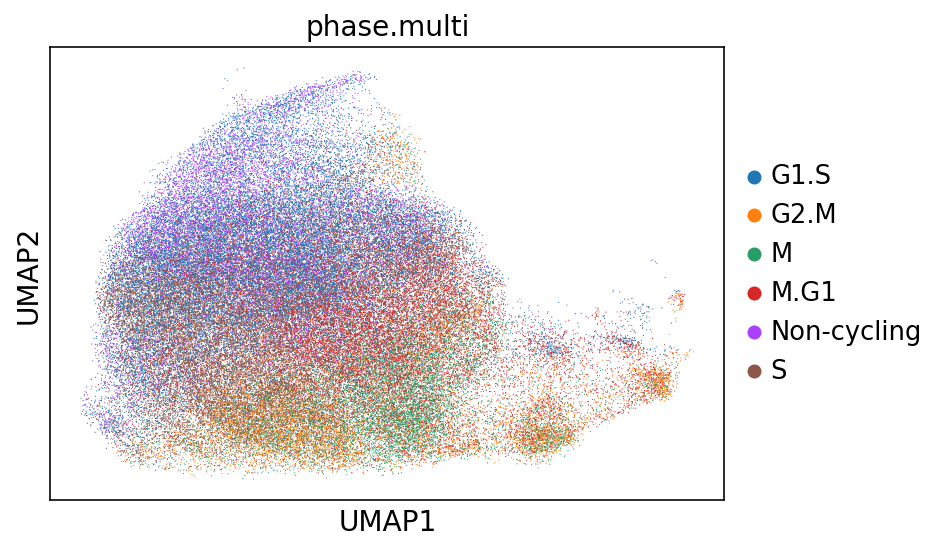

In [16]:
adata.obs['phase.multi']=phase_assignments
sc.pl.umap(adata,color=['phase.multi'])

In [17]:
print(adata.obs['phase.multi'].cat.categories)

Index(['G1.S', 'G2.M', 'M', 'M.G1', 'Non-cycling', 'S'], dtype='object')


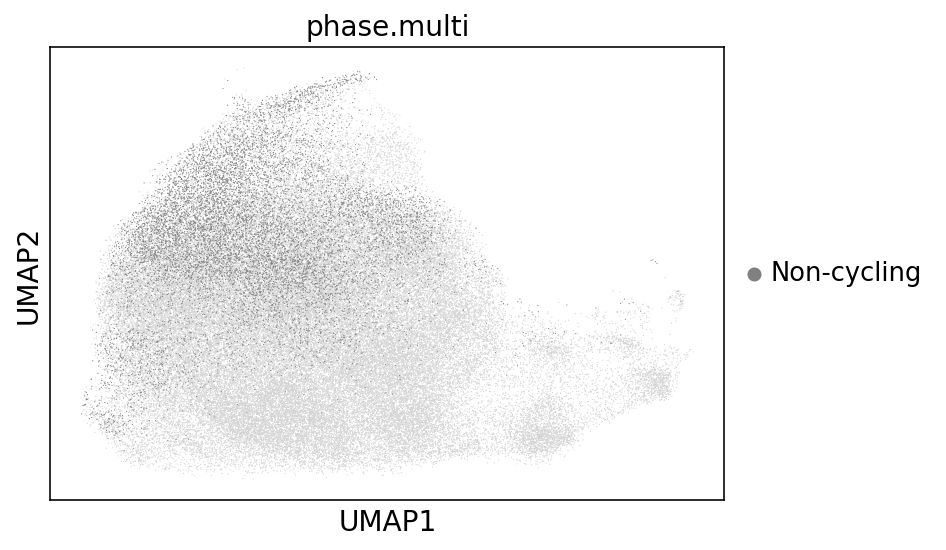

In [19]:
adata.obs['phase.multi'].cat.reorder_categories(['Non-cycling','G1.S','S','G2.M','M','M.G1'], inplace = True)
adata.uns['phase.multi_colors']=['gray','purple','red','orange','gold','lightblue']
sc.pl.umap(adata,color=['phase.multi'],groups=['Non-cycling'])

In [20]:
#save this adata
adata.write(SUBSAMPLED+'.channel_1to32.counts_per_cell'+str(counts)+'.regress_out_vbc.analysis.1000cells.new_format.2021-03-23.h5ad')

Cell cycle embedding
==

In [21]:
#embed cells based on cc genes
ccgenes=set()
for cc in genes2keep_dict:
    for gene in genes2keep_dict[cc]:
        ccgenes.add(gene)
ccgenes=list(ccgenes)

In [22]:
adata_cc=adata[:,ccgenes]
adata_cc

View of AnnData object with n_obs × n_vars = 90262 × 79 
    obs: 'batch', 'known', 'n_counts', 'n_genes', 'percent_mito', 'n_counts_downsampled', 'n_counts_original', 'vbc.counts', 'batch_num4', 'batch_num7', 'batch_num11', 'batch_num8', 'batch_num13', 'batch_num23', 'batch_num9', 'batch_num2', 'batch_num24', 'batch_num10', 'batch_num12', 'batch_num16', 'batch_num20', 'batch_num18', 'batch_num25', 'batch_num31', 'batch_num28', 'batch_num5', 'batch_num14', 'batch_num15', 'batch_num29', 'batch_num3', 'batch_num6', 'batch_num22', 'batch_num26', 'batch_num17', 'batch_num27', 'batch_num1', 'batch_num19', 'batch_num21', 'batch_num0', 'batch_num30', 'louvain', 'guide', 'A146P', 'K117R', 'Y166H', 'K169K', 'K178K', 'T50P', 'A146V', 'L52F', 'K176Q', 'A155G', 'G60D', 'T158T', 'K88K', 'D119G', 'L159S', 'G13V', 'Q61P', 'D33E', 'S136N', 'K179R', 'T74T', 'G60S', 'Q99E', 'G13R', 'G12D', 'R164Q', 'I36M', 'C185Y', 'I163S', 'P34R', 'G60V', 'G12A', 'K117N', 'T158A', 'G12I', 'T74A', 'K5E', 'P34L', 'A59E',

In [23]:
sc.pp.neighbors(adata_cc,use_rep='X')
sc.tl.umap(adata_cc)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:02:48)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:04:15)


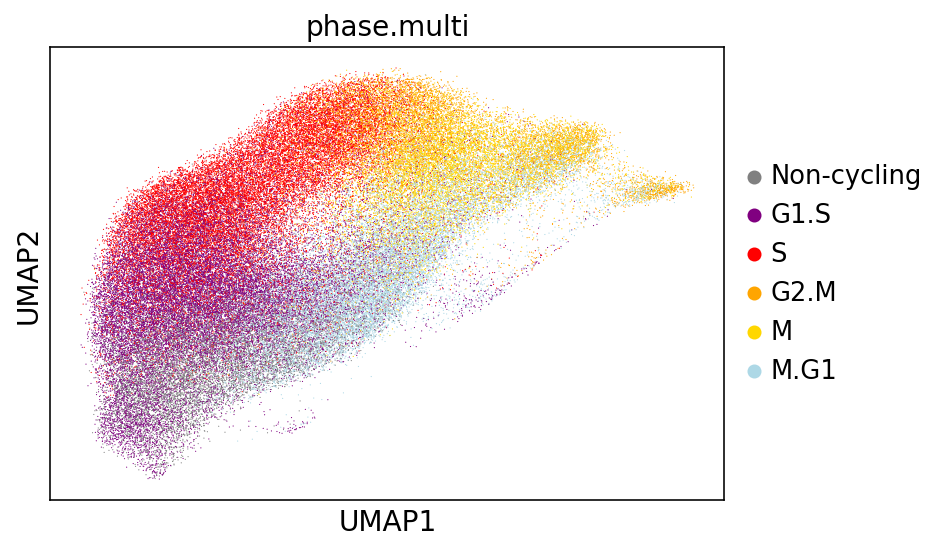

In [24]:
sc.pl.umap(adata_cc,color=['phase.multi'])

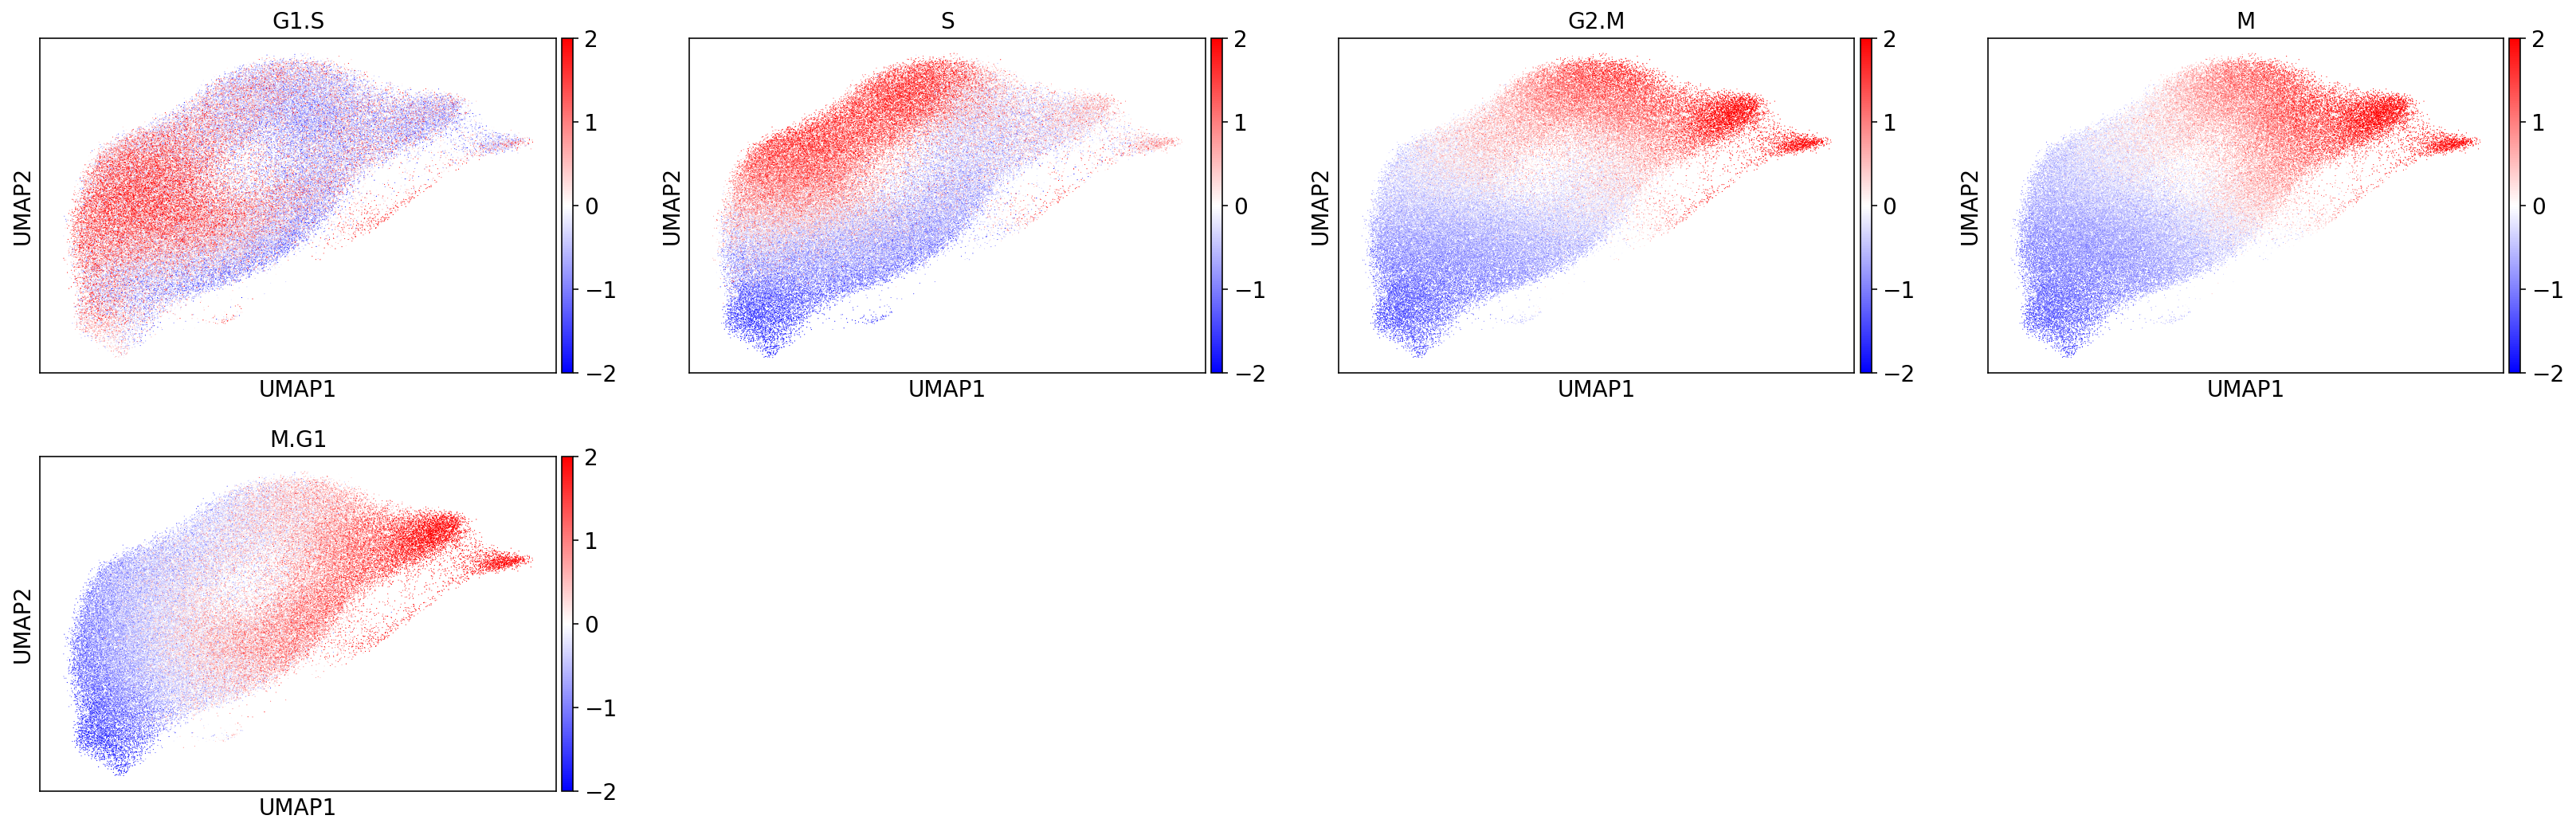

In [25]:
sc.pl.umap(adata_cc,color=['G1.S','S','G2.M','M','M.G1'],cmap='bwr',vmin=-2,vmax=2)

In [26]:
adata_cc.write(SUBSAMPLED+'.channel_1to32.counts_per_cell'+str(counts)+'.regress_out_vbc.analysis.1000cells.new_format.cc.2021-03-23.h5ad')

In [58]:
#embed cells based on cc genes
ccgenes=set()
for cc in genes2keep_dict:
    for gene in genes2keep_dict[cc]:
        ccgenes.add(gene)
ccgenes=list(ccgenes)

In [63]:
adata_cc=adata[:,ccgenes]
adata_cc

View of AnnData object with n_obs × n_vars = 85778 × 87 
    obs: 'batch', 'known', 'n_counts', 'n_genes', 'percent_mito', 'n_counts_downsampled', 'n_counts_original', 'uninfected', 'vbc.counts', 'batch_num18', 'batch_num8', 'batch_num25', 'batch_num22', 'batch_num24', 'batch_num28', 'batch_num27', 'batch_num23', 'batch_num17', 'batch_num19', 'batch_num12', 'batch_num31', 'batch_num5', 'batch_num15', 'batch_num7', 'batch_num9', 'batch_num4', 'batch_num2', 'batch_num13', 'batch_num6', 'batch_num26', 'batch_num16', 'batch_num10', 'batch_num1', 'batch_num29', 'batch_num0', 'batch_num11', 'batch_num30', 'batch_num3', 'batch_num14', 'batch_num21', 'batch_num20', 'louvain', 'guide', 'G105C', 'G266E', 'G154V', 'Y220C', 'V216V', 'WT', 'M246V', 'E286K', 'C176Y', 'S366A', 'H193Y', 'L344L', 'E339K', 'P47P', 'V173M', 'V272L', 'R158H', 'C135F', 'A83V', 'L194R', 'T312S', 'S127F', 'R249S', 'R337L', 'R273H', 'V272M', 'R273L', 'Q5R', 'R249M', 'Y205C', 'P278S', 'T118T', 'R175H', 'R158R', 'S241F', 'P47S'

In [ ]:
sc.pp.neighbors(adata_cc,use_rep='X')
sc.tl.umap(adata_cc)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:02:44)
computing UMAP


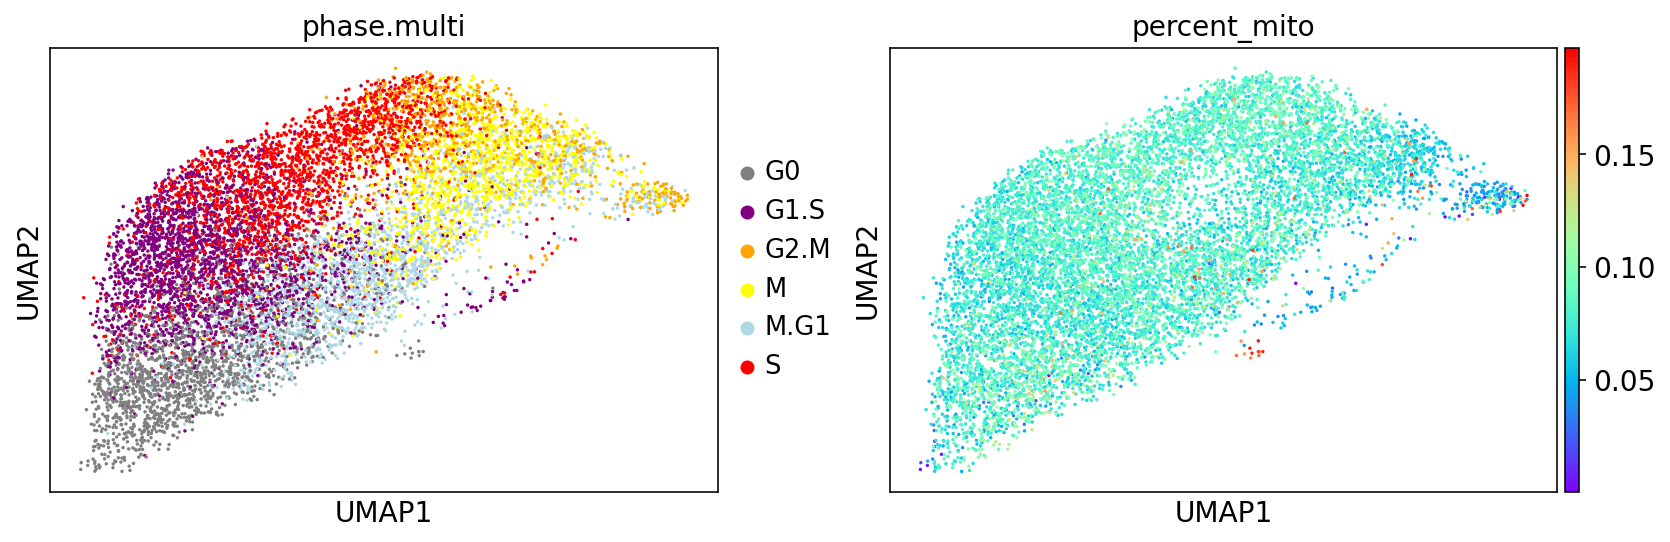

In [62]:
sc.pl.umap(adata_cc,color=['phase.multi','percent_mito'],cmap='rainbow')

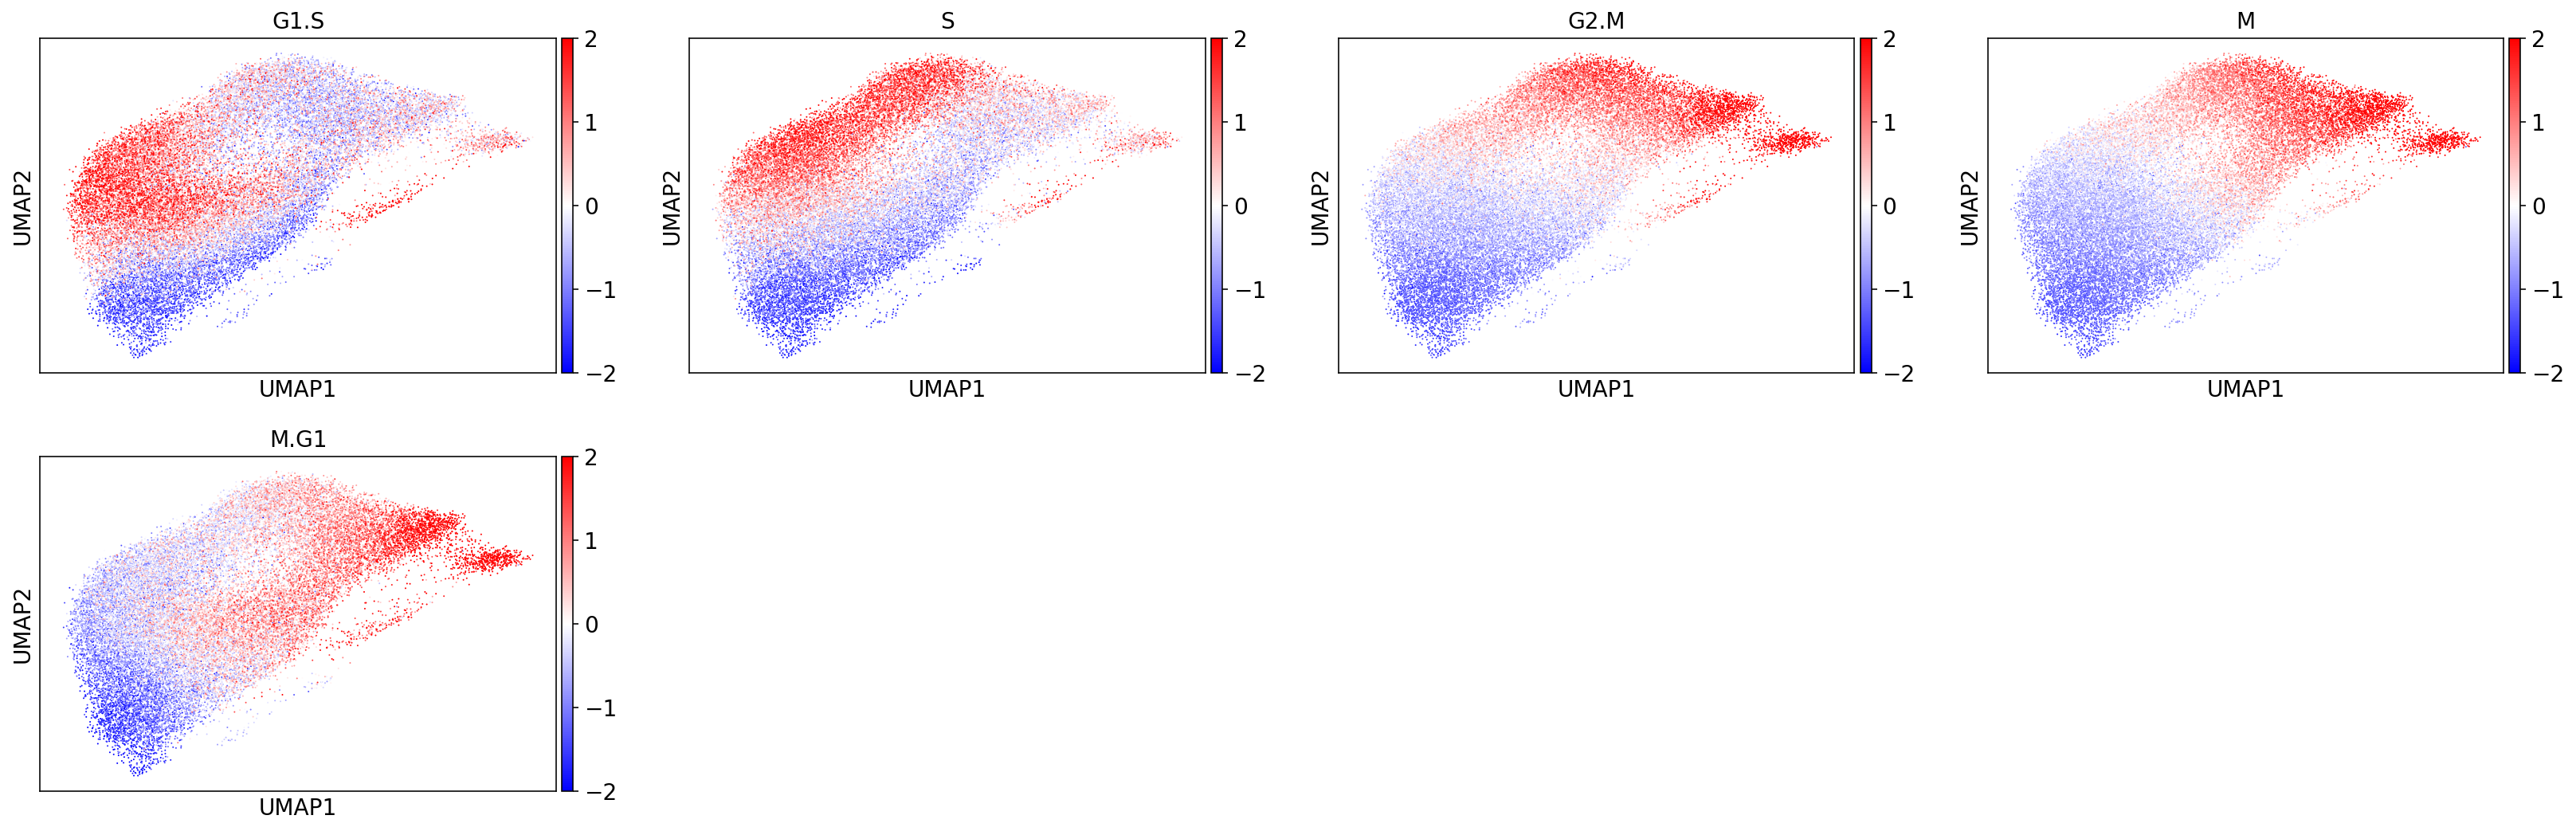

In [43]:
sc.pl.umap(adata_cc,color=['G1.S','S','G2.M','M','M.G1'],cmap='bwr',vmin=-2,vmax=2)

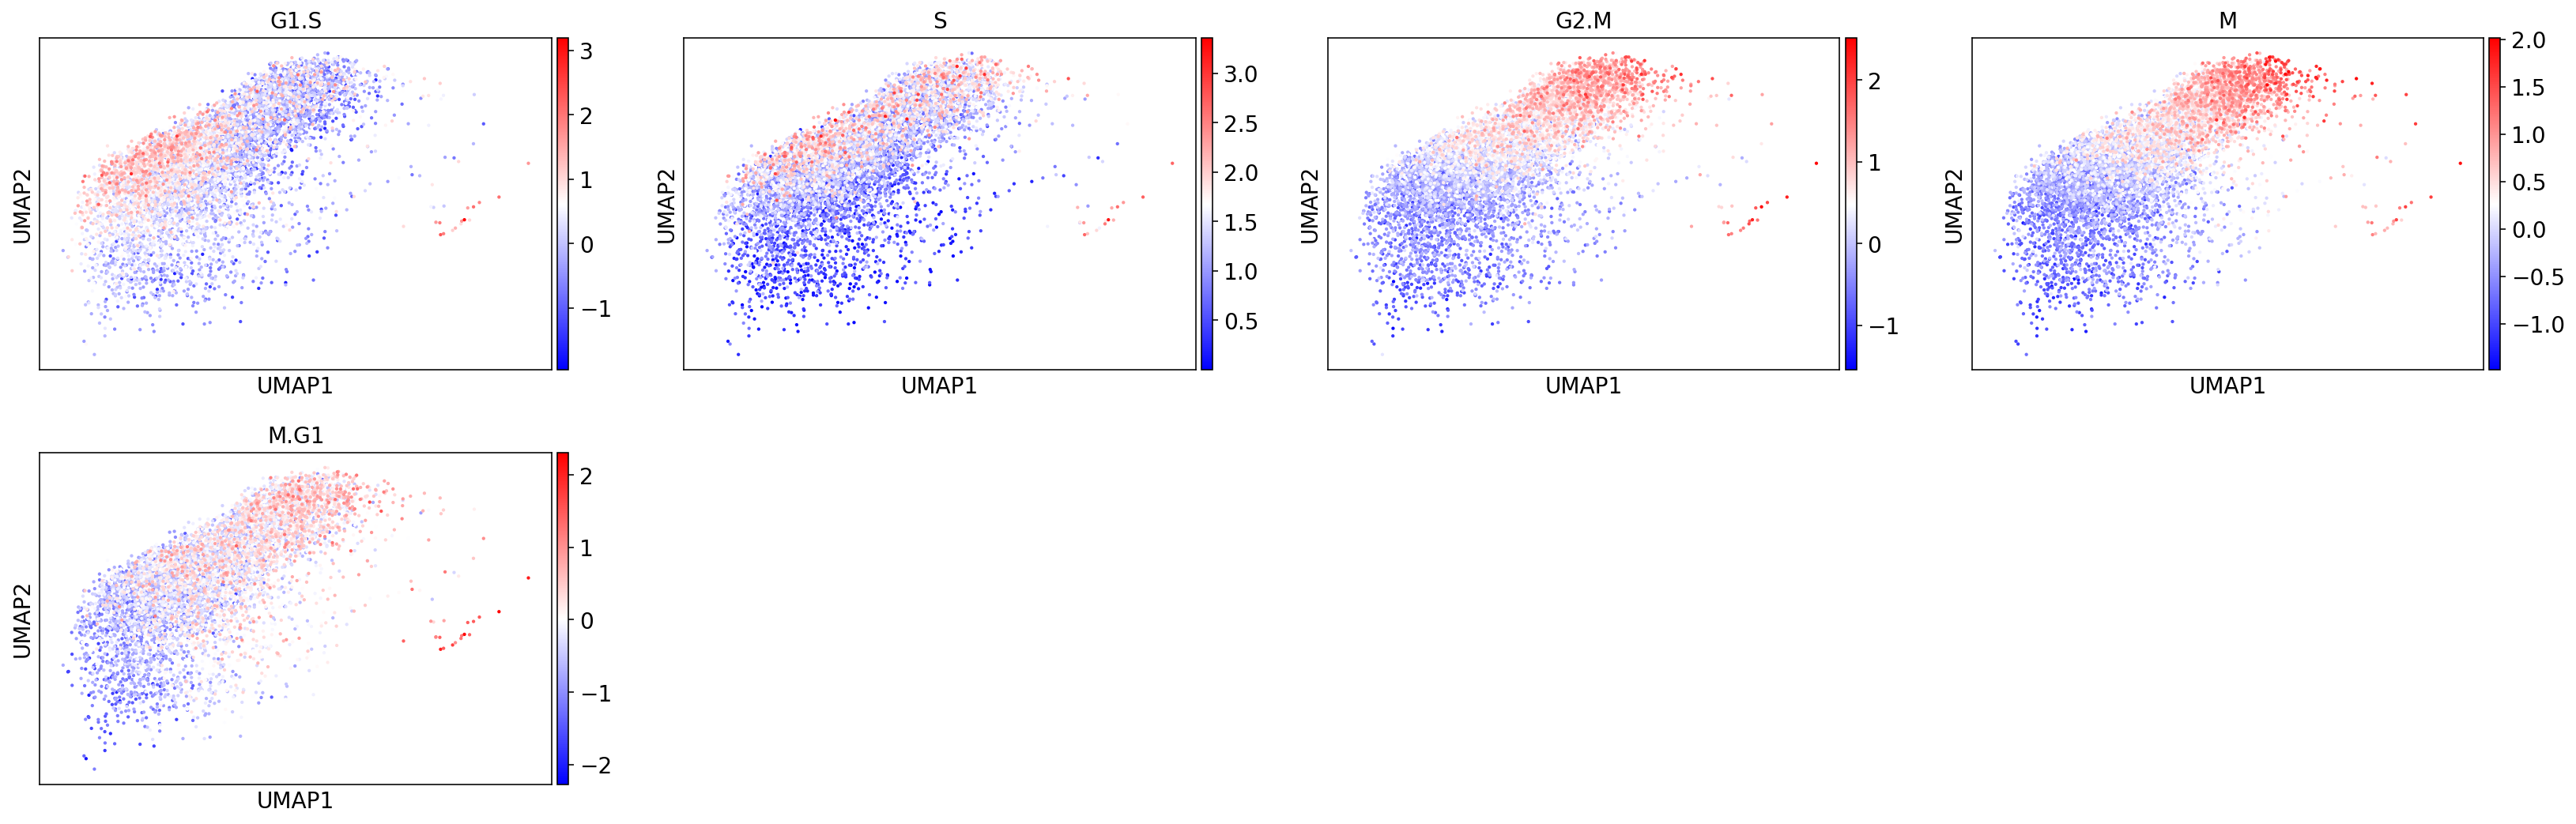

In [46]:
sc.pl.umap(adata_cc[adata_cc.obs['phase.multi']=='M.G1',:],
           color=['G1.S','S','G2.M','M','M.G1'],cmap='bwr')

In [48]:
adata_cc.obs.loc[:,['G1.S','S','G2.M','M','M.G1']].mean(axis=0)

G1.S   -0.002288
S      -0.007491
G2.M   -0.004461
M      -0.004702
M.G1   -0.008795
dtype: float64

In [47]:
adata_cc[adata_cc.obs['phase.multi']=='M.G1',:].obs.loc[:,['G1.S','S','G2.M','M','M.G1']]

G1.S         S      G2.M         M      M.G1
CGAGCCATCATGCATGch11 -0.037362  0.262455 -0.734418 -1.110503 -0.836219
AAAGCAAAGTCTTGCAch6   0.655663  1.177868  0.305206 -0.174513  0.494117
GTCTTCGCAATGTAAGch30 -0.323388  1.314537  1.086435  0.909400  0.637948
AACGTTGCACATTAGCch14  0.623789  1.140980 -0.407808 -0.253142 -0.626844
CTGTTTATCACATAGCch9  -0.352642  1.550255  0.937754  0.826072  0.806137
GACTACAAGTACTTGCch22  0.439805  1.812631 -0.440401 -0.743493 -0.769519
TGCCAAATCGTATCAGch26  0.763328  1.693964 -0.155804  0.080686  0.458107
GGGAGATAGCCGTCGTch4  -0.104627  1.714762  0.111827 -0.231803 -0.750595
TTATGCTGTGCAACGAch31  0.493403  1.119071 -1.091619 -0.818389 -1.154657
TGCGGGTAGATGCCTTch24 -0.153521  0.069002 -0.495629 -1.012277 -0.721915
CTGAAACAGTCAAGCGch20 -0.642099  1.319817 -0.109888 -1.113979 -0.754231
GTACTTTAGTTGAGTAch19 -0.838338  0.739350  0.375266  0.479904  0.278692
TGATTTCCAGATGAGCch5   0.389808  1.062064 -0.637548 -0.912690 -0.298508
CTCGAGGTCTGTACGAch29 -0.214976  0.688365  0.129504 -0.575891 -0.400062
TCAGCTCTCTTACCGCch29 -1.953785  0.569556  0.542563  0.450327 -0.452263
CTCATTACAGGGTACAch8   0.117503  1.745516  0.284079  1.042994  0.664717
AGGGAGTCAGTATCTGch30  0.814034  1.885159 -0.189810 -0.007928 -0.448028
CAGCTGGCATGGTAGGch14  1.227248  1.541614  0.297772  0.003006 -1.152332
CACACTCTCGCCAGCAch15  0.033322  1.967292  1.628214  1.239273  0.714456
ACTATCTGTTACGTCAch3   0.608491  0.609370 -0.188552 -0.515319 -0.570026
TAAGAGAGTGTGAAATch14 -0.103238  1.632993  0.763688  0.182054 -0.444491
GAGCAGACAAAGTCAAch3   0.548380  1.422137  0.160280 -0.025659  0.457215
TAGACCAAGGATGGTCch29 -0.519753  1.446763  0.977547  0.525497 -0.204321
CCATTCGCAGTGACAGch28 -0.152466  2.219371  0.552656  0.472184 -0.339856
TCGTAGATCACAATGCch25 -0.582916  0.513293 -0.153618 -0.596954 -0.295544
AGTAGTCGTCGCCATGch14  0.134577  1.169480  0.568746 -0.424459 -0.778546
CTAGTGACAGCGTTCGch26 -0.744324  1.388628  0.962561 -0.056560 -0.285574
TACAGTGGTGCAGACAch0   0.348307  1.601106  0.641657  0.102197 -0.518233
GTGCAGCGTGGTCCGTch9  -0.637931  0.269586 -0.354898 -0.639674 -0.377583
GACTAACGTAGGCATGch22  1.122033  1.459791  0.061865 -0.120258 -0.442692
...                        ...       ...       ...       ...       ...
TTGGCAAAGGGATGGGch26 -0.519161  1.080693  0.243064 -0.418378 -0.158230
ATAACGCCATTAGCCAch26  0.294769  0.833593 -0.567473 -0.805905 -0.658371
TGCGCAGAGTGGAGAAch4  -0.111564  0.851901 -0.544786 -0.591335 -1.043709
GGTGCGTTCACATACGch16 -0.102132  1.197767  1.043724  1.195352  0.665305
CCACGGACACCATCCTch2  -0.812820  1.516898  0.720350  0.819791  0.455164
TGACAACGTTGGTAAAch4  -0.051684  0.995233  0.053028 -0.393503 -0.411690
CCCAGTTCAATCCAACch29 -0.062173  1.495098 -0.034726 -0.576957 -0.533432
GCTGCTTCACATAACCch7  -0.404828  1.549908  1.292842  0.744035  0.925134
TCTTCGGTCATGTAGCch17 -0.010381  0.596353 -0.190439 -0.322749  0.394024
CGTCACTTCCGTACAAch0   1.065716  1.411083 -0.035057 -0.641953 -0.823913
GATCTAGAGAAACCTAch18  0.491121  1.753848 -0.189933 -0.780352 -0.455904
TAGAGCTGTTCCGGCAch17  0.979133  1.066441 -0.025533 -0.413556 -0.342119
TGCCCTACAGGACGTAch13  0.960472  1.767798  0.515269 -0.026609 -0.971372
CACATAGGTTACGACTch25  0.628216  1.553329  0.520107  0.365563  0.359012
GCTGGGTCAGCTGTATch24  1.147609  1.831651  0.547992  0.302492  0.293491
AAGGTTCCAGCTTCGGch26 -1.058454  1.085979  0.446160  0.038423 -1.194762
GCGCGATAGTGGGATCch19 -0.755064  1.190227  0.905574  0.409820  0.101181
TCTATTGCAAACAACAch5   0.791690  2.212613  0.595163 -0.118498  0.181894
TCACAAGTCAGTACGTch4   0.424114  1.628316  0.111432 -0.401926 -0.647898
ACGATGTGTCCCTTGTch9   0.288092  0.916979 -0.971522 -0.833944 -0.753262
GTTCTCGAGACTGGGTch27 -0.698404  0.689887  0.564799  0.478468 -0.523662
CCCTCCTTCCTAAGTGch24  1.405185  2.337917  0.972970  1.371626  1.120788
AGCGGTCGTTCGCTAAch11 -0.911326  1.168872  0.774133 -0.018900  0.069573
TCAGATGTCACCATAGch20  0.143769  1.522664  0.389533  0.036421 -0.697456
TCAATCTCAAGCCTATch27  0.261478  1.127837 -0.581304

In [20]:
adata=adata[~adata.obs['variant'].isin(['multiple']),:]
adata

View of AnnData object with n_obs × n_vars = 84778 × 1224 
    obs: 'batch', 'known', 'n_counts', 'n_genes', 'percent_mito', 'n_counts_downsampled', 'n_counts_original', 'uninfected', 'vbc.counts', 'batch_num18', 'batch_num8', 'batch_num25', 'batch_num22', 'batch_num24', 'batch_num28', 'batch_num27', 'batch_num23', 'batch_num17', 'batch_num19', 'batch_num12', 'batch_num31', 'batch_num5', 'batch_num15', 'batch_num7', 'batch_num9', 'batch_num4', 'batch_num2', 'batch_num13', 'batch_num6', 'batch_num26', 'batch_num16', 'batch_num10', 'batch_num1', 'batch_num29', 'batch_num0', 'batch_num11', 'batch_num30', 'batch_num3', 'batch_num14', 'batch_num21', 'batch_num20', 'louvain', 'guide', 'G105C', 'G266E', 'G154V', 'Y220C', 'V216V', 'WT', 'M246V', 'E286K', 'C176Y', 'S366A', 'H193Y', 'L344L', 'E339K', 'P47P', 'V173M', 'V272L', 'R158H', 'C135F', 'A83V', 'L194R', 'T312S', 'S127F', 'R249S', 'R337L', 'R273H', 'V272M', 'R273L', 'Q5R', 'R249M', 'Y205C', 'P278S', 'T118T', 'R175H', 'R158R', 'S241F', 'P47

In [21]:
#get bulk, cluster it
perturb.tl.bulk(adata,'variant')

Trying to set attribute `.obs` of view, copying.


In [22]:
#save bulk for the clustering
res=DATA+'/'+PROTEIN+'/clustering/'+PROTEIN
os.system('mkdir -p '+DATA+'/'+PROTEIN+'/clustering/')
adata.uns['bulk.variant'].to_csv(res+'.bulk_2021-03-23.csv')
print(res+'.bulk_2021-03-23.csv')

/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/TP53/clustering/TP53.bulk_2021-03-23.csv


In [ ]:
#go to r and cluster

In [23]:
#make the anno table
#add scores and cluster information
#read in the annotation file to add the clusters to it

FDR=0.01
#original anno
ANNO=DATA+'/'+PROTEIN+'/anno'
anno=pd.read_csv(ANNO+'/'+PROTEIN+'.anno.complete2.csv',sep='\t')
anno.index=anno['Variant']

anno['Position']=anno['Position'].astype('Int32')
anno['Count_pancan']=anno['Count_pancan'].astype('Int32')
anno['Count_ExAC']=anno['Count_ExAC'].astype('Int32')

#scores
score='HotellingT2.mean'
SCORE_DIR=DATA+'/'+PROTEIN+'/scoring/scores'
scorefile=SCORE_DIR+'/scores.iter1.cells1000.cells.csv'
scores=pd.read_csv(scorefile,header=0,index_col=0)
anno['HotellingT2']=scores.loc[anno.index,score]
anno['HotellingT2.q']=scores.loc[anno.index,'HotellingT2.q']

#cluster info
sorted_variants_df=pd.read_csv(DATA+'/'+PROTEIN+'/clustering/'+PROTEIN+'.corrL1.sorted_variants_2021-03-23.csv',header=None)
sorted_variants_df.index=sorted_variants_df[0]
anno['cluster_color']=sorted_variants_df.loc[anno.index,1]

f='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2019-06-07/TP53/mutational_signatures/TP53_mutationalSignatures_Giacomelli.txt'
mutsig=pd.read_csv(f,sep='\t',skiprows=1)
mutsig.index=mutsig['Allele']

#modify the names for the synonymous ones
import re
new_vars=[]
for i in range(mutsig.shape[0]):
    v=mutsig.index[i]
    new_var_here=v
    if 'B' in v:
        new_var_here=re.sub('B',v[0],v)
    new_vars.append(new_var_here)
mutsig.index=new_vars

anno.head()


/ahg/regevdata/users/oursu/software/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1017: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


Variant Variant.1  Position From To mutation_type  Count_pancan  \
Variant                                                                   
R175H     R175H     R175H       175    C  T        Single           993   
R273C     R273C     R273C       273    G  A        Single           677   
R248Q     R248Q     R248Q       248    C  T        Single           656   
R273H     R273H     R273H       273    C  T        Single           622   
R248W     R248W     R248W       248    G  A        Single           550   

         Count_ExAC control_status control_color Library_synthesis  \
Variant                                                              
R175H           NaN        unknown         white                in   
R273C           NaN        unknown         white                in   
R248Q           NaN        unknown         white    not in library   
R273H           NaN        unknown         white                in   
R248W           NaN        unknown         white                in   

          long_name control_status2 text_color  HotellingT2  HotellingT2.q  \
Variant                                                                      
R175H    TP53_R175H         hotspot       blue   365.212626        0.00001   
R273C    TP53_R273C         hotspot       blue   241.672932        0.00001   
R248Q           NaN         hotspot       blue          NaN            NaN   
R273H    TP53_R273H         hotspot       blue   169.301582        0.00001   
R248W    TP53_R248W         hotspot       blue   289.806536        0.00001   

        cluster_color  
Variant                
R175H            navy  
R273C         #99CCFF  
R248Q             NaN  
R273H         #99CCFF  
R248W            navy

In [24]:
#annotate the cluster color onto the adata
adata.obs['Cluster']=list(anno.loc[adata.obs['variant'],'cluster_color'])
adata.obs['Cluster2']=list(anno.loc[adata.obs['variant'],'cluster_color'])
adata.obs['Cluster2'][adata.obs['variant']=='unassigned']='slateblue'

/ahg/regevdata/users/oursu/software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [ ]:
bulk=sc.AnnData(adata.uns['bulk.guide.compact'])
print(bulk.obs_names)
print(bulk.var_names)

In [ ]:
#process, cluster
sc.tl.pca(bulk,n_comps=10)
sc.pp.neighbors(bulk)
sc.tl.umap(bulk)
sc.tl.louvain(bulk)

In [ ]:
sc.pl.umap(bulk,color=['louvain','CDKN1A'])

In [ ]:
color_v=[]
palette={'0':'blue','1':'orange','2':'green','3':'red'}
for i in range(bulk.n_obs):
    color_v.append(palette[bulk.obs['louvain'][i]])
colors=pd.DataFrame({'louvain':color_v},index=bulk.obs_names)
colors['louvain']=pd.Categorical(colors['louvain'], ordered=True,
                   categories=['orange','red','green','blue'])
colors=colors.sort_values(by='louvain')
colors['louvain']=colors['louvain'].astype('str')

In [ ]:
x=0.25
sns.clustermap(adata.uns['bulk.guide.compact'].T.loc[:,colors.index],vmin=-x,vmax=x,cmap='bwr',
               col_colors=colors,
               figsize=(30,30),
               xticklabels=True,
               #col_cluster=False,
              )

In [ ]:
corr=perturb.util.corr_mat(adata.uns['bulk.guide.compact'])

In [ ]:
x=1
sns.clustermap(corr.loc[colors.index,colors.index],vmin=-x,vmax=x,cmap='bwr',
               col_colors=colors,
               figsize=(30,30),
               xticklabels=True,
               yticklabels=True,
               #col_cluster=False,
               #row_cluster=False,
              )